In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Exploration

Start by exploring the dataset to understand the distribution and nature of each feature. Key activities include:

- Summary statistics (mean, median, standard deviation)
- Distribution plots (histograms, box plots)
- Correlation analysis

In [2]:
df= pd.read_csv("TravelInsurancePrediction.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
df.shape ## checking the shape of the data

(1987, 10)

### data has 1987 row and 10 columns

In [5]:
df.duplicated().sum()  

0

### there are no duplicate recoards

In [6]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

### There are no missing value

In [12]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [26]:
df.size

17883

In [13]:
df.columns  # calumns name

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [14]:
df.rename(columns={"GraduateOrNot":"Graduate"},inplace=True)  # renaming calumn to make it better to read

In [15]:
import re
def add_underscores(name):
    return re.sub(r'(?<!^)(?=[A-Z])','_', name).lower()
df.columns = [add_underscores(col) for col in df.columns]

In [16]:
df.head()

,unnamed: 0,age,employment _type,graduate,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [17]:
df.drop('unnamed: 0',axis =1, inplace= True)  #Droping 'unnamed: 0' as it has no signifinance

In [18]:
df.head()  # Now we have a clean data which is easier to understand

,age,employment _type,graduate,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [19]:
df.select_dtypes(include="object").nunique()  # we have 4 columns that has categorical data and each has 2 types 

employment _type         2
graduate                 2
frequent_flyer           2
ever_travelled_abroad    2
dtype: int64

In [20]:
df.corr() ##correlation between numeric columns

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8344\2203621796.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() ##correlation between numeric columns


,age,annual_income,family_members,chronic_diseases,travel_insurance
age,1.000000,-0.020101,0.027409,0.007359,0.061060
annual_income,-0.020101,1.000000,-0.015367,-0.001149,0.396763
family_members,0.027409,-0.015367,1.000000,0.028209,0.079909
chronic_diseases,0.007359,-0.001149,0.028209,1.000000,0.018190
travel_insurance,0.061060,0.396763,0.079909,0.018190,1.000000


In [21]:
df.describe(include="all")

,age,employment _type,graduate,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


From this we can understand things such as
- Total travellers are 1987
- we have 2 types of employment and in that Private sector/Self employed has the majority (1417)
- most of the travellers are graduated (1692)
- most of the travellers are not frequent flyers (1570)
- most of the travellers have not travelled abroad (1607)
- Potentionally there are no out liers because 50% count is very close to mean but we will check in deatail in EDA

## EDA 

F:\bia\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


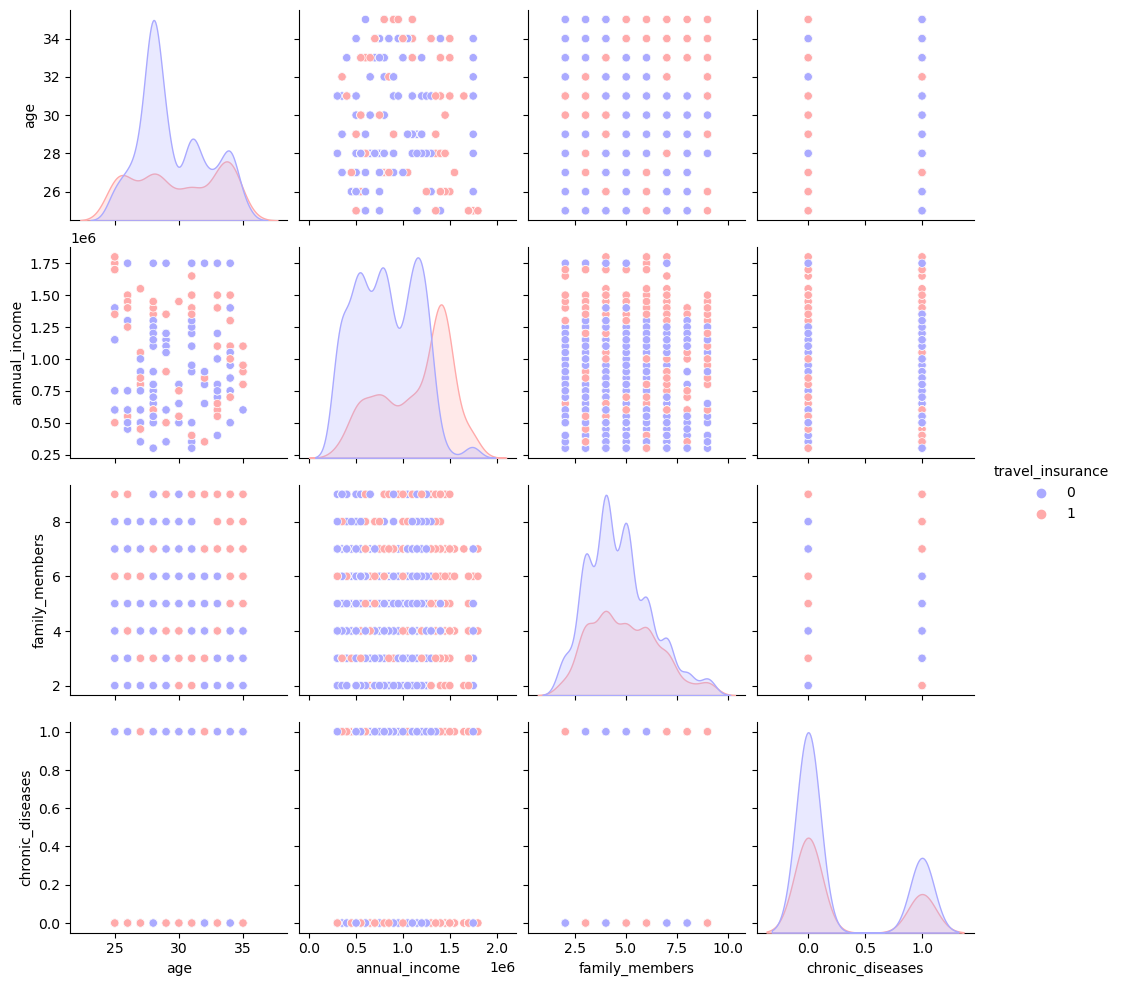

In [76]:
sns.pairplot(df,hue='travel_insurance',palette='bwr')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10160\696044101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"] , bins= 30)


<Axes: xlabel='age', ylabel='Density'>

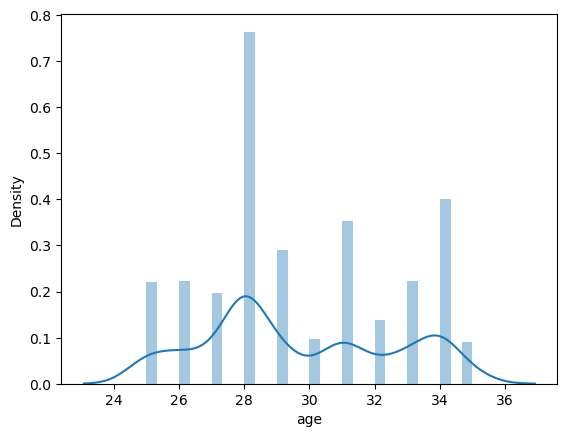

In [17]:
sns.distplot(df["age"] , bins= 30)

### Majority of the travellers in our data are 28 year old

In [18]:
df["age"].value_counts()    

28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: age, dtype: int64

In [19]:
df["age"].sort_values().unique()   ## Age range is from 25 to 35 years old

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], dtype=int64)

<Axes: ylabel='employment _type'>

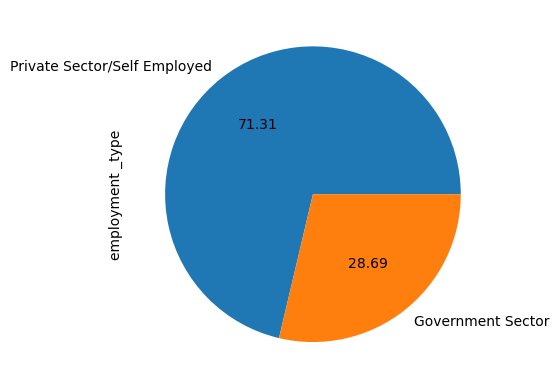

In [20]:
df["employment _type"].value_counts().plot(kind= 'pie' ,autopct='%.2f')

### 1/4 of our travellers work in Government sector (28.69%)

<Axes: ylabel='graduate'>

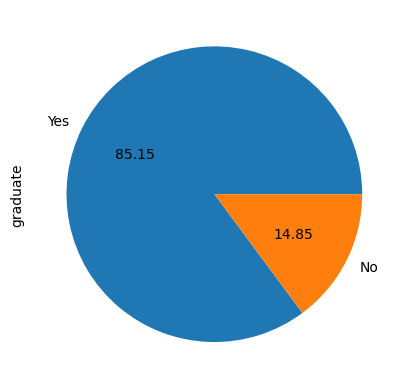

In [21]:
df['graduate'].value_counts().plot(kind= "pie",autopct='%.2f')

### Most of the travellers in our data are Graduate

<Axes: >

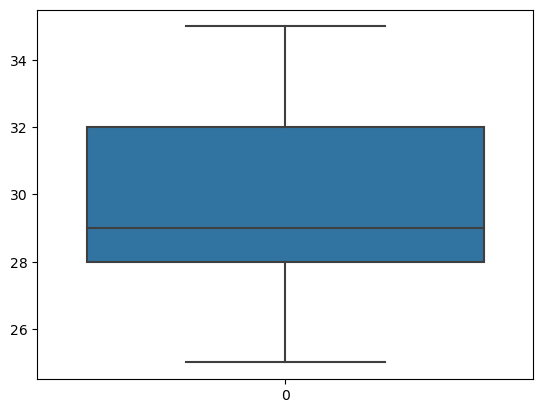

In [22]:
sns.boxplot(df['age'])


<Axes: >

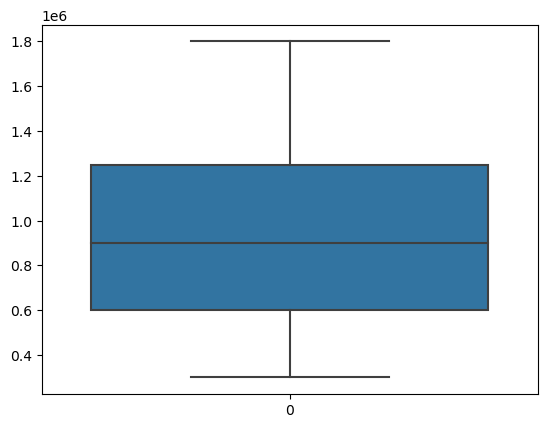

In [23]:
sns.boxplot(df['annual_income'])


<Axes: >

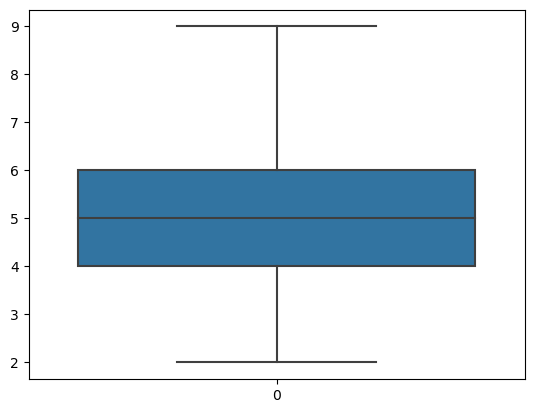

In [24]:
sns.boxplot(df['family_members'])


### From the above 3 box plot we can conclude that there are no outliers in our data 

<Axes: >

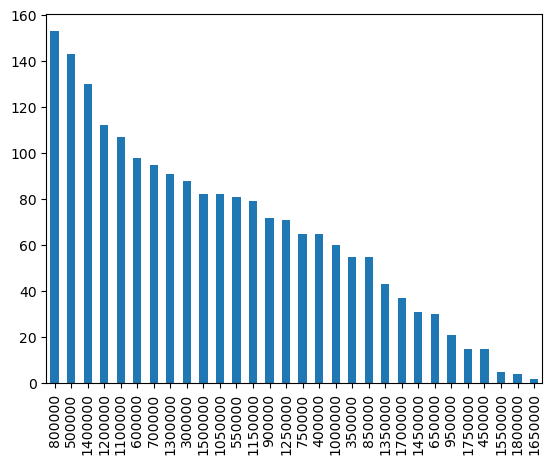

In [25]:
df["annual_income"].value_counts().plot(kind= 'bar')

### here we can see that majority of the travellers earn from 5 - 14L per annually, 8LPA being the highest

<Axes: >

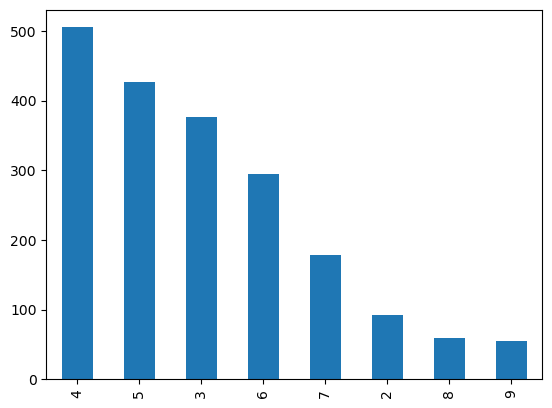

In [26]:
df["family_members"].value_counts().plot(kind="bar"
                                        )

### Majority of the travellers have 4 family members
so they have liability and are most likely to get insurance

<Axes: ylabel='chronic_diseases'>

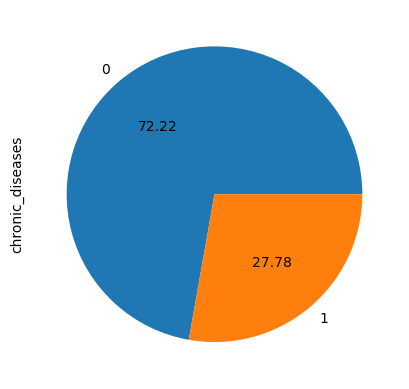

In [27]:
df['chronic_diseases'].value_counts().plot(kind= "pie",autopct='%.2f')

### 72.22% of the travellers in the given data doesnt have any Chronic diseases
which is a good thing also because they are young.

<Axes: ylabel='frequent_flyer'>

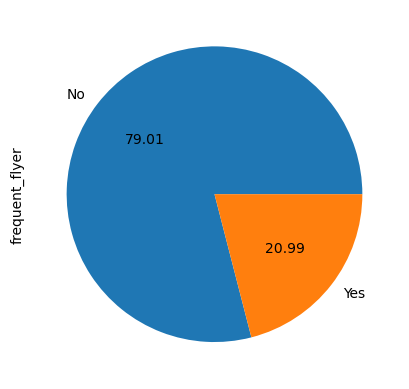

In [28]:
df['frequent_flyer'].value_counts().plot(kind= "pie",autopct='%.2f')

### 79% of the travellers in our data are not frequet flyers


<Axes: ylabel='ever_travelled_abroad'>

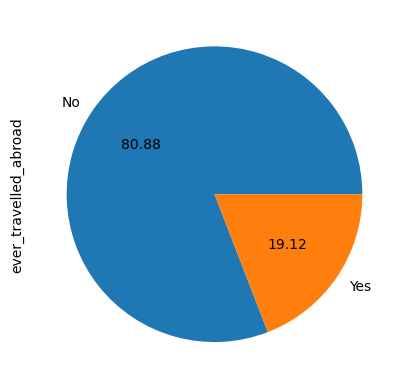

In [29]:
df['ever_travelled_abroad'].value_counts().plot(kind= "pie",autopct='%.2f')

### 80.88% of the travellers in our data have never travelled abroad

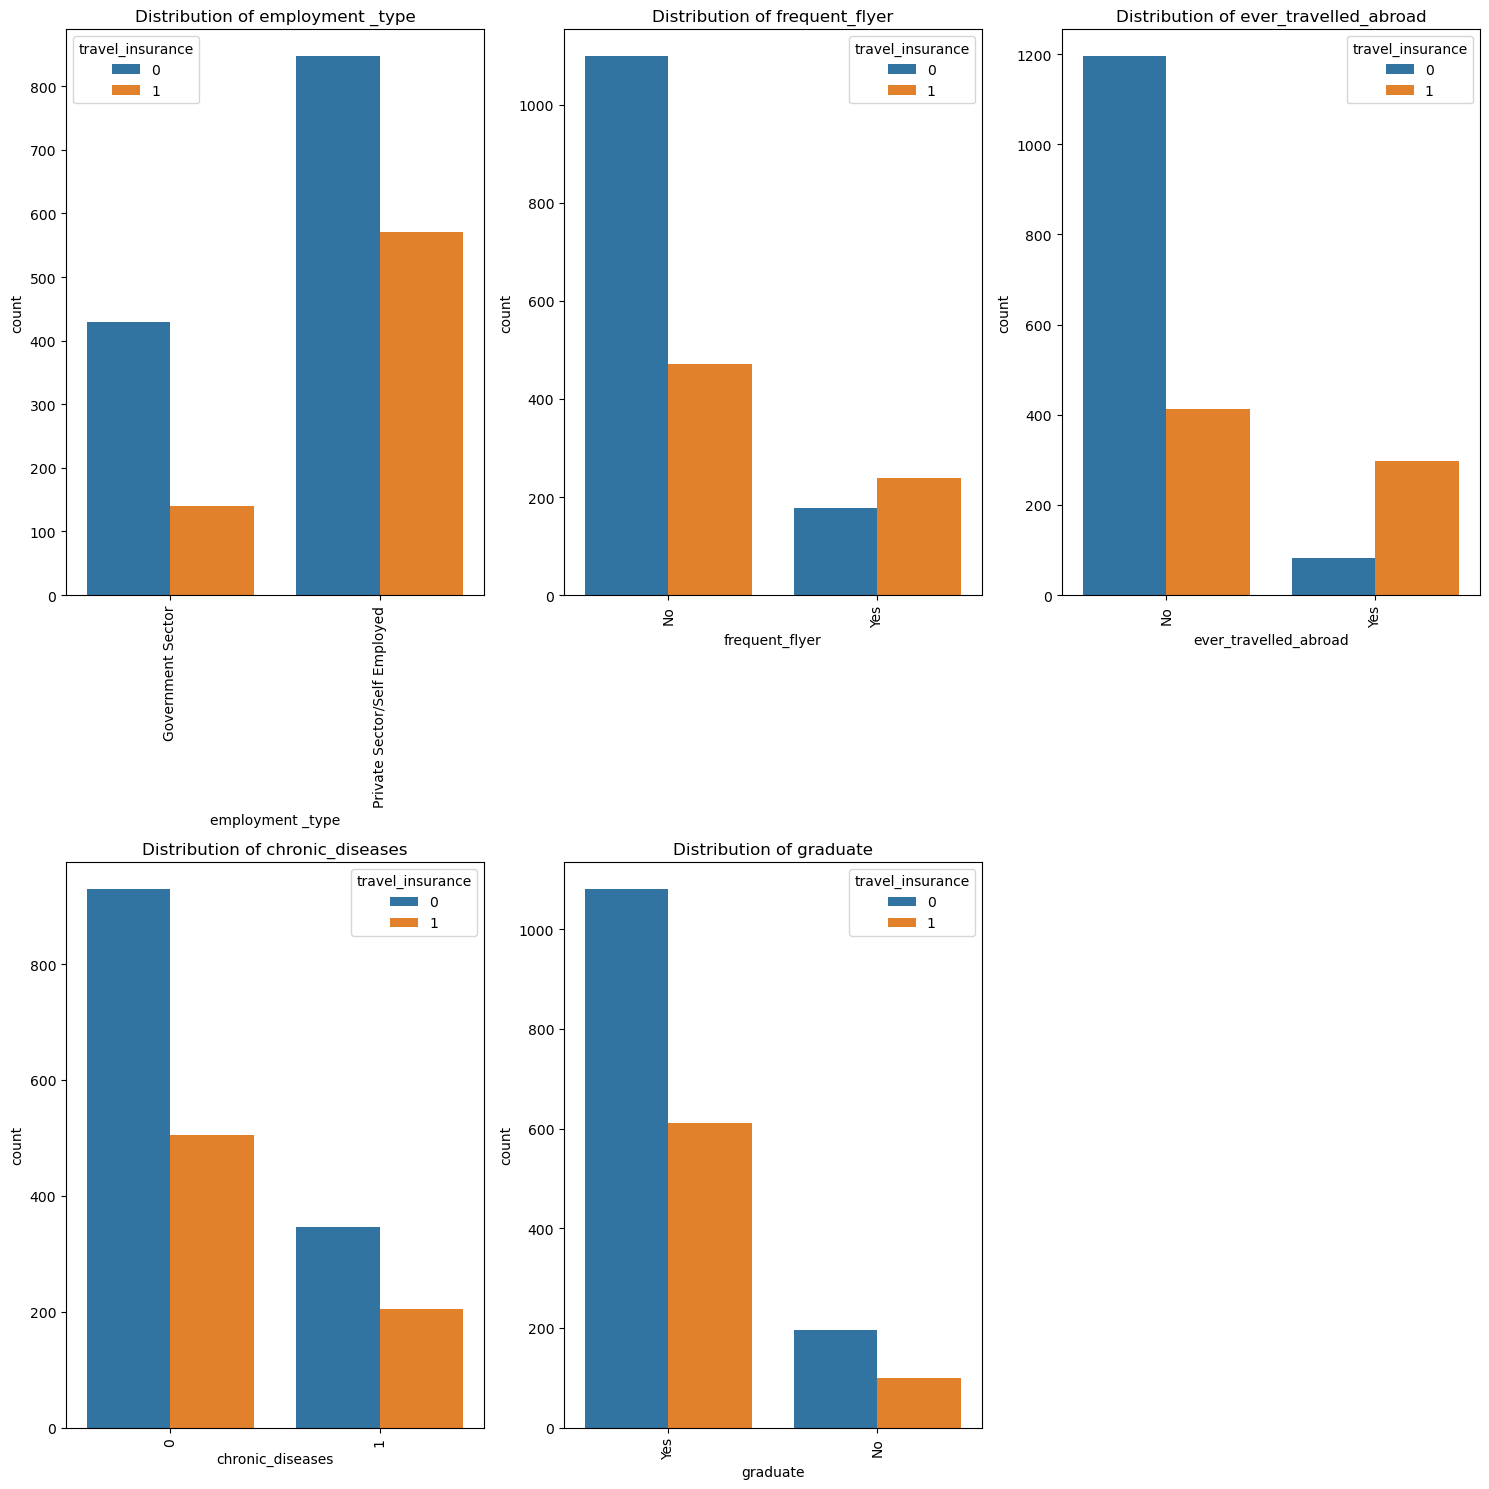

In [225]:
#ploting graph to check the distrubution of different features 
cat_vars = ['employment _type', 'frequent_flyer', 'ever_travelled_abroad','chronic_diseases','graduate']


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='travel_insurance', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    axs[i].set_title(f'Distribution of {var}')

# Remove the sixth subplot (since we have only 5 categorical variables)
fig.delaxes(axs[5])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Conclusion:

The analysis of the distribution of various categorical features with respect to travel insurance purchase has provided several valuable insights:

1. **Employment Type**:
   - There are noticeable differences in travel insurance uptake across different employment types.
   - Certain employment types show a higher propensity for purchasing travel insurance, indicating that job stability and nature of work may influence the decision to buy insurance.

2. **Frequent Flyer**:
   - Frequent flyers exhibit a significantly higher rate of travel insurance purchase compared to non-frequent flyers.
   - This suggests that individuals who travel more frequently are more aware of the benefits and necessity of travel insurance.

3. **Ever Travelled Abroad**:
   - Customers who have traveled abroad before are more likely to purchase travel insurance.
   - This could be due to higher awareness of potential risks associated with international travel.

4. **Chronic Diseases**:
   - Individuals with chronic diseases tend to purchase travel insurance more often.
   - This is likely because they are more conscious of health risks and the need for coverage during travel.

5. **Graduate**:
   - The education level of individuals (whether they are graduates or not) also shows variation in insurance purchase behavior.
   - Graduates tend to purchase travel insurance more frequently, which may be attributed to better understanding of the benefits and importance of insurance.

Overall, these distributions highlight key demographic and behavioral factors that influence travel insurance purchase decisions. Understanding these patterns is crucial for developing targeted marketing strategies and improving risk management in the travel insurance industry.


In [11]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


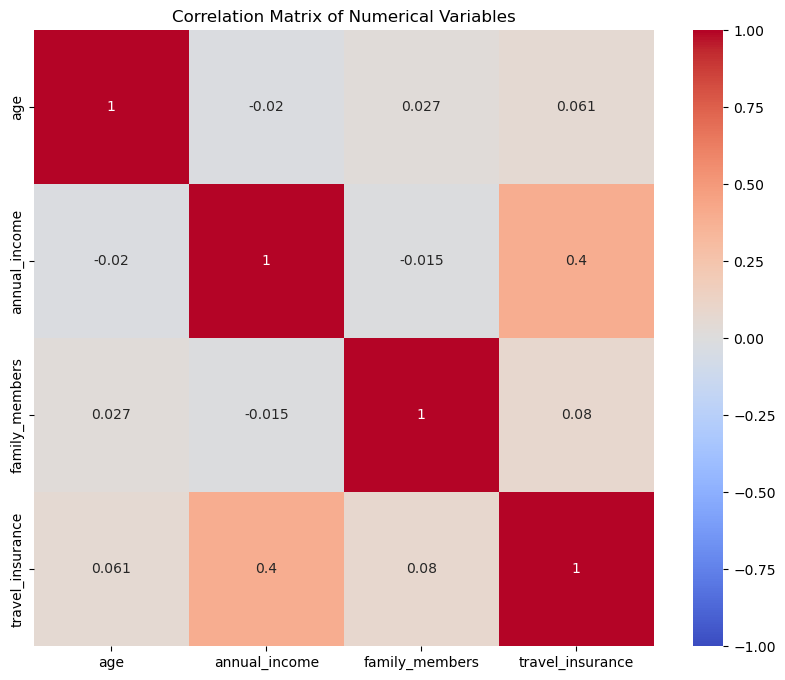

In [25]:
#num_vars = ['age', 'annual_income', 'family_members']

# Compute the correlation matrix
correlation_matrix = df[['age', 'annual_income', 'family_members','travel_insurance']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Conclusion:

The correlation matrix heatmap provides insights into the relationships between the numerical variables: Age, Annual Income, and Family Members. The analysis reveals the following:

1. Annual Income and Travel Insurance:
- There is a moderate positive correlation (0.40) between annual income and travel insurance. This suggests that as annual income increases, there's a tendency for individuals to be more likely to have travel insurance.

2. Age and Travel Insurance:
- There's a very weak positive correlation (0.06) between age and travel insurance. This indicates that age has minimal influence on whether someone has travel insurance or not.

3. Family Members and Travel Insurance:
- The correlation between the number of family members and travel insurance is weak (0.08). This suggests that family size doesn't have a strong impact on travel insurance decisions.

4. Age and Annual Income:
- Interestingly, there's a very slight negative correlation (-0.02) between age and annual income. However, this correlation is so close to zero that it suggests there's practically no linear relationship between age and income in this dataset.

5. Age and Family Members:
- There's a very weak positive correlation (0.03) between age and the number of family members, suggesting that age doesn't strongly predict family size in this dataset.

6. Annual Income and Family Members:
- There's a very weak negative correlation (-0.02) between annual income and the number of family members, indicating that income doesn't have a strong relationship with family size.

##### In conclusion, the strongest relationship in this dataset is between annual income and travel insurance. This suggests that financial factors play the most significant role in determining whether someone has travel insurance. Age and family size have minimal impact on travel insurance decisions according to this data.

<Axes: xlabel='travel_insurance', ylabel='annual_income'>

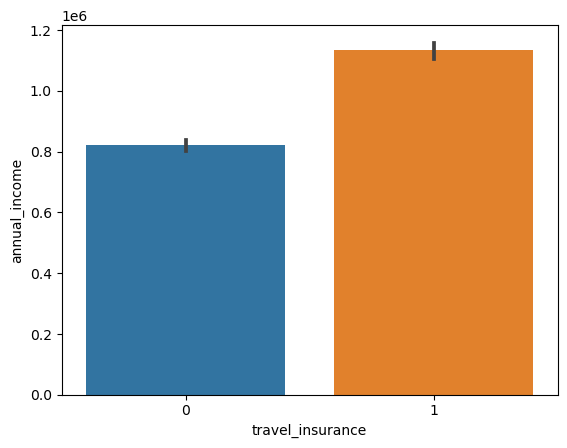

In [32]:
sns.barplot(data=df, y = "annual_income", x="travel_insurance" )

### here we can see that income and travel insurance are correlated
 travelers who bought insurance tend to have a higher annual income compared to those who did not. This insight can be useful in understanding the relationship between income and the likelihood of purchasing travel insurance, which may help in further model building and feature selection.

<Axes: >

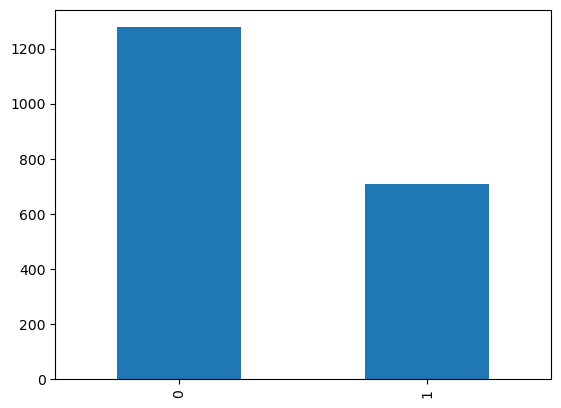

In [30]:
df['travel_insurance'].value_counts().plot(kind='bar')

### Our target column is imbalance
we will balance it before model training

### We can see here that the data has majority of the travellers who are not insured

In [31]:
df['travel_insurance'].value_counts()

0    1277
1     710
Name: travel_insurance, dtype: int64

# Data Preprocessing

.
- Encoding Categorical Variables: Convert categorical variables (e.g., trip type, booking channel) into numerical format using techniques such as one-hot encoding.
- Feature Scaling: Standardize or normalize features if necessary to ensure they are on a similar scale.



In [242]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [253]:
X = df.drop('travel_insurance', axis=1)

In [254]:
X.head()

,age,employment _type,graduate,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No


In [255]:
cat_cols = ['employment _type', 'frequent_flyer', 'ever_travelled_abroad']
num_cols =['age', 'annual_income', 'family_members']

In [256]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')   #one hot encoding cat columns

encoded_data = ohe.fit_transform(X[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(cat_cols))


In [257]:
X_combined.head()

,employment _type_Government Sector,employment _type_Private Sector/Self Employed,frequent_flyer_No,frequent_flyer_Yes,ever_travelled_abroad_No,ever_travelled_abroad_Yes,age,annual_income,family_members
0,1.0,0.0,1.0,0.0,1.0,0.0,0.463430,-1.414061,0.774964
1,0.0,1.0,1.0,0.0,1.0,0.0,0.463430,0.842012,1.396373
2,0.0,1.0,1.0,0.0,1.0,0.0,1.493446,-1.148641,-0.467855
3,0.0,1.0,1.0,0.0,1.0,0.0,-0.566587,-0.617800,-1.089265
4,0.0,1.0,0.0,1.0,1.0,0.0,-0.566587,-0.617800,2.017783


In [258]:
scaler = StandardScaler()    #

scaled_data = scaler.fit_transform(X[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)


X_combined = pd.concat([encoded_df, scaled_df], axis=1)


In [259]:
encoded_df.head()

,employment _type_Government Sector,employment _type_Private Sector/Self Employed,frequent_flyer_No,frequent_flyer_Yes,ever_travelled_abroad_No,ever_travelled_abroad_Yes
0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0


In [260]:
X_combined.head()

,employment _type_Government Sector,employment _type_Private Sector/Self Employed,frequent_flyer_No,frequent_flyer_Yes,ever_travelled_abroad_No,ever_travelled_abroad_Yes,age,annual_income,family_members
0,1.0,0.0,1.0,0.0,1.0,0.0,0.463430,-1.414061,0.774964
1,0.0,1.0,1.0,0.0,1.0,0.0,0.463430,0.842012,1.396373
2,0.0,1.0,1.0,0.0,1.0,0.0,1.493446,-1.148641,-0.467855
3,0.0,1.0,1.0,0.0,1.0,0.0,-0.566587,-0.617800,-1.089265
4,0.0,1.0,0.0,1.0,1.0,0.0,-0.566587,-0.617800,2.017783


### ANOVA 
for numeric column and target column

In [261]:
from scipy.stats import ttest_ind
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris

In [262]:
anova_f_values, anova_p_values = f_classif(scaled_df, y)            # Apply ANOVA for numerical features
anova_results = pd.DataFrame({"Feature": num_cols, "F-Value": anova_f_values, "P-Value": anova_p_values})

# Select numerical features based on p-value threshold
anova_selected_features = anova_results[anova_results["P-Value"] < 0.05]["Feature"].tolist()


## Chi-Square
to check if there is significant association between Categorical columns and the target column

In [263]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

In [264]:
# Apply Chi-square for categorical features
chi2_values, chi2_p_values = chi2(encoded_df, y)
chi2_results = pd.DataFrame({"Feature": ohe.get_feature_names_out(cat_cols), "Chi2-Value": chi2_values, "P-Value": chi2_p_values})

# Select categorical features based on p-value threshold
chi2_selected_features = chi2_results[chi2_results["P-Value"] < 0.05]["Feature"].tolist()


In [265]:
print("ANOVA Results:")
print(anova_results)

print("\nSelected Numerical Features based on ANOVA:")
print(anova_selected_features)

print("\nChi-Square Results:")
print(chi2_results)

print("\nSelected Categorical Features based on Chi-Square:")
print(chi2_selected_features)




ANOVA Results:
          Feature     F-Value       P-Value
0             age    7.428382  6.476684e-03
1   annual_income  370.862293  6.635018e-76
2  family_members   12.756575  3.632080e-04

Selected Numerical Features based on ANOVA:
['age', 'annual_income', 'family_members']

Chi-Square Results:
                                         Feature  Chi2-Value       P-Value
0             employment _type_Government Sector   30.973784  2.615373e-08
1  employment _type_Private Sector/Self Employed   12.459461  4.158798e-04
2                              frequent_flyer_No   22.464557  2.140571e-06
3                             frequent_flyer_Yes   84.578787  3.692053e-20
4                       ever_travelled_abroad_No   71.305915  3.059174e-17
5                      ever_travelled_abroad_Yes  301.548960  1.514635e-67

Selected Categorical Features based on Chi-Square:
['employment _type_Government Sector', 'employment _type_Private Sector/Self Employed', 'frequent_flyer_No', 'frequent_flye

### By using chi square we will select
['employment _type_Government Sector', 'employment _type_Private Sector/Self Employed', 'frequent_flyer_No', 'frequent_flyer_Yes', 'ever_travelled_abroad_No', 'ever_travelled_abroad_Yes'] as our cat feature

### By using ANOVA we will select 
['age', 'annual_income', 'family_members'] as our num feature



In [266]:
X = X_combined
y = df['travel_insurance']

### As our data is imbalance i am using SMOTE 

In [267]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)


In [268]:
from sklearn.model_selection import train_test_split

In [269]:
X_train_final, X_test_final, y_train, y_test = train_test_split(X_resampled,  y_resampled, test_size=0.3, random_state=42)
# spliting data for modeling

In [270]:
X_train_final.head()

,employment _type_Government Sector,employment _type_Private Sector/Self Employed,frequent_flyer_No,frequent_flyer_Yes,ever_travelled_abroad_No,ever_travelled_abroad_Yes,age,annual_income,family_members
548,1.0,0.0,1.0,0.0,1.0,0.0,-0.909926,-0.219670,0.153554
2307,0.0,1.0,1.0,0.0,1.0,0.0,-0.456410,0.529054,1.396373
2004,1.0,0.0,0.0,1.0,1.0,0.0,0.806768,-0.299494,-1.089265
1304,0.0,1.0,1.0,0.0,1.0,0.0,1.493446,0.311171,0.153554
306,1.0,0.0,1.0,0.0,1.0,0.0,1.150107,-0.750510,0.153554


In [271]:
X_test_final.head()

,employment _type_Government Sector,employment _type_Private Sector/Self Employed,frequent_flyer_No,frequent_flyer_Yes,ever_travelled_abroad_No,ever_travelled_abroad_Yes,age,annual_income,family_members
1266,0.0,1.0,1.0,0.0,0.0,1.0,1.150107,1.240142,2.017783
1749,1.0,0.0,1.0,0.0,0.0,1.0,1.150107,0.443881,-0.467855
2050,0.0,1.0,1.0,0.0,1.0,0.0,1.836785,-0.352380,1.396373
393,0.0,1.0,0.0,1.0,1.0,0.0,-0.223248,0.311171,-1.089265
1544,0.0,1.0,1.0,0.0,1.0,0.0,-0.223248,0.709302,2.017783


In [272]:
X_train_final.shape

(1787, 9)

In [273]:
X_test_final.shape

(767, 9)

## Model selection 

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





In [275]:
model = LogisticRegression()                  #LogisticRegression
model.fit(X_train_final, y_train)


y_pred = model.predict(X_test_final)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7001303780964798
Confusion Matrix:
[[298  67]
 [163 239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       365
           1       0.78      0.59      0.68       402

    accuracy                           0.70       767
   macro avg       0.71      0.71      0.70       767
weighted avg       0.72      0.70      0.70       767



### We need to improve our recall for class 1  and accuracy

In [211]:
dt_model = DecisionTreeClassifier(random_state=42)    #DecisionTree
dt_model.fit(X_train_final, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_final)

# Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy}')


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       365
           1       0.85      0.71      0.77       402

    accuracy                           0.78       767
   macro avg       0.79      0.78      0.78       767
weighted avg       0.79      0.78      0.78       767

Decision Tree Confusion Matrix:
[[315  50]
 [118 284]]
Accuracy: 0.7809647979139505


In [212]:
model = RandomForestClassifier( random_state=42)    #RandomForestClassifier
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)
print("RandomForestClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



RandomForestClassification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       365
           1       0.88      0.73      0.80       402

    accuracy                           0.81       767
   macro avg       0.81      0.81      0.81       767
weighted avg       0.82      0.81      0.81       767

Random Forest Confusion Matrix:
[[324  41]
 [107 295]]
Accuracy: 0.8070404172099087


####  RandomForestClassifier is giving good recall, precicion,f1sore and accuracy

In [214]:
from xgboost import XGBClassifier            #XGB

XGBmodel = XGBClassifier(objective='binary:logistic', random_state=0)

XGBmodel.fit(X_train_final, y_train)


y_pred = XGBmodel.predict(X_test_final)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       365
           1       0.90      0.74      0.81       402

    accuracy                           0.82       767
   macro avg       0.83      0.82      0.82       767
weighted avg       0.83      0.82      0.82       767

XGBoost Confusion Matrix:
[[331  34]
 [104 298]]
Accuracy: 0.8200782268578879


### XGB is giving better results than random forest after changing the sampling method to smote from random over sampling

## Hyperparameter tuning

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_final, y_train)

# Best parameters
print("Best parameters found: ", grid_search_rf.best_params_)

# Predict and evaluate
y_pred_rf = grid_search_rf.predict(X_test_final)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.80       365
           1       0.92      0.64      0.76       402

    accuracy                           0.78       767
   macro avg       0.81      0.79      0.78       767
weighted avg       0.82      0.78      0.78       767

Random Forest Confusion Matrix:
[[342  23]
 [143 259]]


In [216]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize XGBoost Classifier
model = XGBClassifier(objective='binary:logistic', random_state=0)

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train_final, y_train)

# Print the best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best Accuracy found: ", grid_search.best_score_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_final)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best Accuracy found:  0.8326823466816894
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       365
           1       0.92      0.74      0.82       402

    accuracy                           0.83       767
   macro avg       0.84      0.83      0.83       767
weighted avg       0.85      0.83      0.83       767

XGBoost Confusion Matrix:
[[340  25]
 [106 296]]
Accuracy: 0.8292046936114733


### After tuning XGB is giving better results, finalizing  this model

### Summary and Conclusion

The XGBoost model achieved a high accuracy of 83.92%, indicating that it correctly predicted the outcome for a large proportion of the samples.

1. **Accuracy and Precision**: 
   - The model achieved an overall accuracy of 83.92%.
   - Precision for class 0 (not opting for insurance) is 76%, indicating that when the model predicted a customer would not opt for insurance, it was correct 76% of the time.
   - Precision for class 1 (opting for insurance) is higher at 92%, indicating a higher accuracy in predicting those who would opt for insurance.

2. **Recall and F1-score**:
   - Recall for class 0 is 93%, indicating that the model correctly identified 93% of all customers who did not opt for insurance.
   - Recall for class 1 is 74%, indicating that the model correctly identified 74% of all customers who did opt for insurance.
   - The F1-score, which balances precision and recall, is 84% for class 0 and 82% for class 1, reflecting a good overall balance between precision and recall for both classes.

### Conclusion

Overall, the XGBoost model demonstrates strong predictive performance with high accuracy, precision, and recall for both classes. It effectively identifies customers likely to opt for travel insurance based on the provided features.
This conclusion summarizes the model's strengths and provides insight into its capabilities.

## Saving model

In [217]:
with open('best_xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved to best_xgboost_model.pkl")

Best model saved to best_xgboost_model.pkl
